In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
dataPath = 'E:/mythesis/01-DataSet/images'

In [3]:
"""
This function take the dictory-Path of images and:-
1-Read image from each category file.
2-resize images to 32x32x3.
3-labeling image:-
    0-->Stop
    1-->Do not Enter
    2-->Traffic jam is close
    3-->Yeild
4-Shuffle the array to randomized it.
5-Divide into X,Y
return X,Y
"""
def loadDataSet(dataPath):
    data = []
    imageSize = 40
    for cat in os.listdir(dataPath):
        label = int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath = dataPath+'/'+cat+'/'+i
            try:
                image = cv2.imread(imagePath,0) 
                image = cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X = [] #image
    Y = [] #labels
    for img,l in data: 
        X.append(img)
        Y.append(l)
    X = np.array(X)
    Y = np.array(Y).reshape(len(Y),1)
    return X,Y

In [4]:
#Load Data Set 
images,labels=loadDataSet(dataPath)

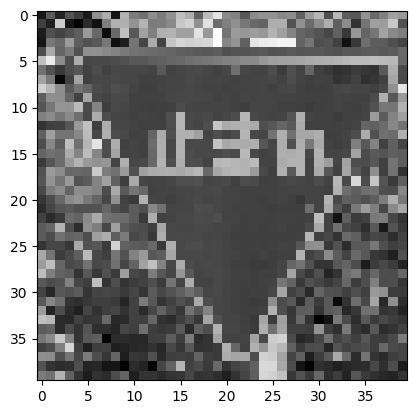

[0]


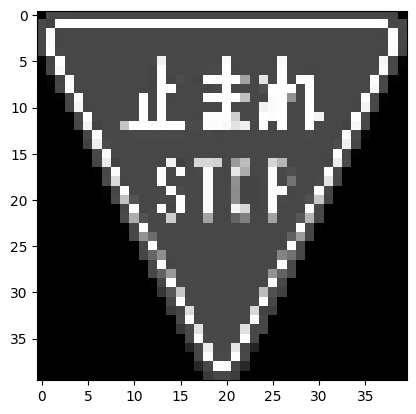

[0]


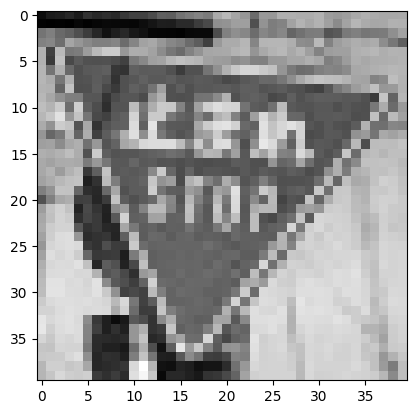

[0]


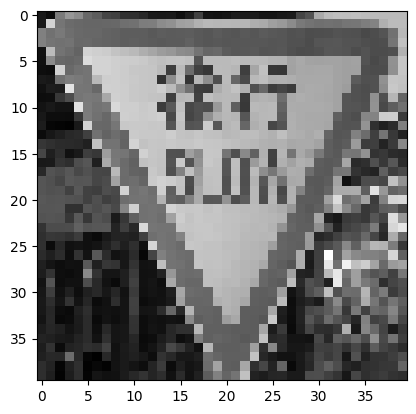

[1]


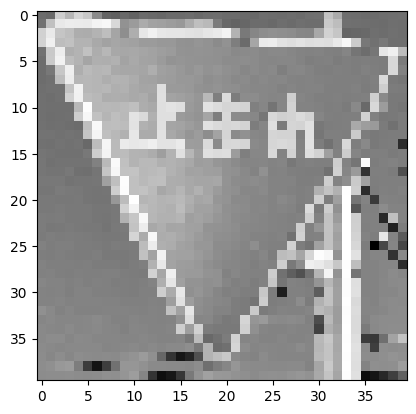

[0]


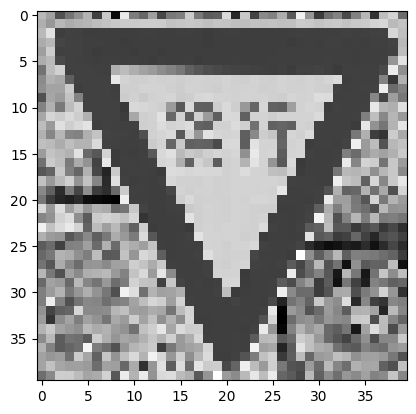

[1]


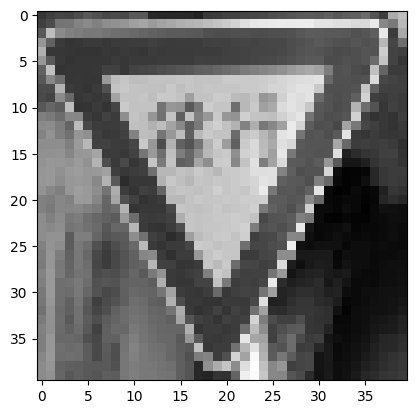

[1]


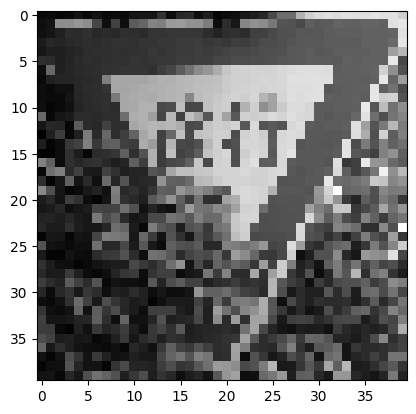

[1]


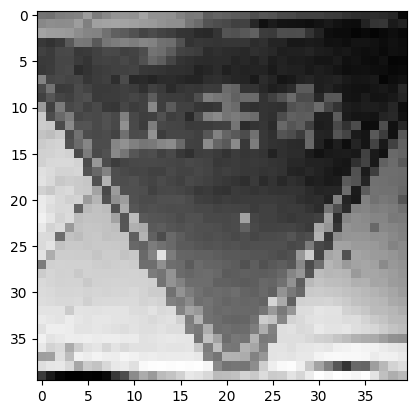

[0]


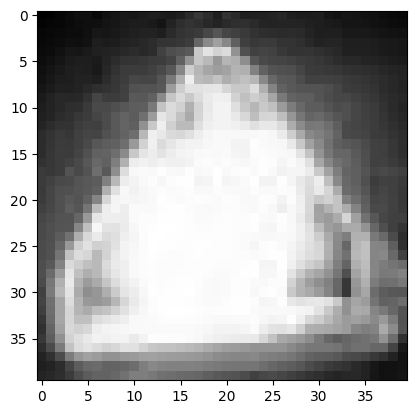

[2]


In [5]:
#plot some examples from our images
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.show()
    print(labels[i])

In [6]:
#Compute the mean and Standard Deviation , becouse we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 124.29100235849057
The Standard Deviation= 65.38073440717123


In [11]:
images.shape

(318, 40, 40)

In [12]:
m=images.shape[0] # 3D Array (number of training images,)
imageShape=images.shape[1:]

In [13]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 254
the Number of Testing Example= 64


In [14]:
x_trainNorm = (x_train - mu)/std
x_testNorm  = (x_test - mu)/std
print("Shape of x_trainNorm:", x_trainNorm.shape)
print("Shape of x_testNorm:", x_testNorm.shape)
x_trainNorm = x_trainNorm.reshape(254, 40, 40,1)
x_testNorm = x_testNorm.reshape(64, 40, 40,1)

Shape of x_trainNorm: (254, 40, 40)
Shape of x_testNorm: (64, 40, 40)


In [15]:
def preprocessingImage(image=None,imageSize=40,mu= 127.70122641509434,std= 74.58174034218196):
    try:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    except:
        pass
    image = cv2.resize(image,(imageSize,imageSize))
    image = (image - mu) / std
    image = image.reshape(1,imageSize,imageSize,1)
    return image

In [16]:
import tensorflow as tf
from tensorflow import keras

In [37]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.997):
            self.model.stop_training=True
            
model = keras.Sequential([
    keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=(40,40,1)),
    keras.layers.MaxPool2D(pool_size=(4,4)),
    keras.layers.Flatten(),
    keras.layers.Dense(3,tf.nn.softmax)
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 9, 9, 8)           0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 648)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1947      
                                                                 
Total params: 2027 (7.92 KB)
Trainable params: 2027 (7.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
#Fitting 
model.fit(x_trainNorm,
          y_train,
          epochs = 15,
          callbacks = [myCallBack()])

Epoch 1/15
8/8 [==============================] - 0s 4ms/step - loss: 0.9993 - accuracy: 0.4803
Epoch 2/15
8/8 [==============================] - 0s 4ms/step - loss: 0.7479 - accuracy: 0.7480
Epoch 3/15
8/8 [==============================] - 0s 4ms/step - loss: 0.6077 - accuracy: 0.8307
Epoch 4/15
8/8 [==============================] - 0s 4ms/step - loss: 0.5009 - accuracy: 0.8780
Epoch 5/15
8/8 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8937
Epoch 6/15
8/8 [==============================] - 0s 4ms/step - loss: 0.3619 - accuracy: 0.9173
Epoch 7/15
8/8 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.9173
Epoch 8/15
8/8 [==============================] - 0s 4ms/step - loss: 0.2750 - accuracy: 0.9370
Epoch 9/15
8/8 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9528
Epoch 10/15
8/8 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.9567
Epoch 11/15
8/8 [======================

In [39]:
model.evaluate(x_testNorm,
               y_test,
               verbose = 0)

[0.2576364278793335, 0.9375]

In [40]:
model.save('TSModelV3')

INFO:tensorflow:Assets written to: TSModelV3\assets


INFO:tensorflow:Assets written to: TSModelV3\assets


In [41]:
model=keras.models.load_model('TSModelV3')

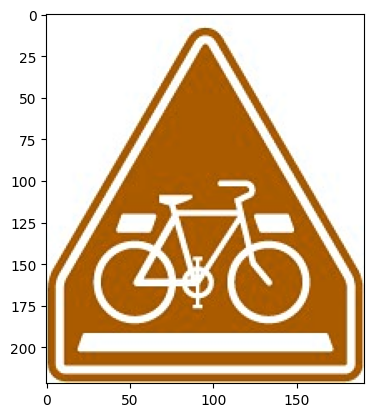

1/1 [==============================] - 0s 57ms/step
Stop = 0.08707497%
Slow = 0.094482355%
Crosswalk = 99.818436%
[[8.7074973e-02 9.4482355e-02 9.9818436e+01]]


In [42]:
imgPath="E:/mythesis/03-Classification/UnseenImages/02/01.jpg"
image = cv2.imread(imgPath,1)
plt.imshow(image)
plt.show()
img=preprocessingImage(image)
pred=model.predict(img)*100 # 4*1

print("Stop = "+str(pred[0][0])+"%")
print("Slow = " + str(pred[0][1])+"%")
print("Crosswalk = "+str(pred[0][2])+"%")

print(pred)